In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random
from matplotlib.patches import Rectangle
import seaborn as sns
from collections import defaultdict

In [2]:
DATASET_PATH = Path('../fire_detection_dataset')

In [3]:
def plot_image_with_boxes(image_path, label_path, mask_path=None):
    """Plot image with all its bounding boxes and optionally the mask."""
    # Read image
    image = cv2.imread(str(image_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Read labels
    boxes = []
    if label_path.exists():
        with open(label_path, 'r') as f:
            for line in f:
                if line.strip():
                    parts = line.strip().split()
                    boxes.append(list(map(float, parts[1:])))
    
    # Create figure
    fig = plt.figure(figsize=(15, 5))
    
    # Plot layout depending on whether we have a mask
    if mask_path is not None and mask_path.exists():
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Original Image')
        
        plt.subplot(1, 3, 2)
        mask = cv2.imread(str(mask_path), cv2.IMREAD_GRAYSCALE)
        plt.imshow(mask, cmap='gray')
        plt.title('Segmentation Mask')
        
        plt.subplot(1, 3, 3)
        plt.imshow(image)
    else:
        plt.imshow(image)
    
    # Draw all bounding boxes
    h, w = image.shape[:2]
    for box in boxes:
        x_center, y_center, width, height = box
        x1 = int((x_center - width/2) * w)
        y1 = int((y_center - height/2) * h)
        box_w = int(width * w)
        box_h = int(height * h)
        
        # Add rectangle patch
        rect = Rectangle((x1, y1), box_w, box_h,
                        linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
    
    plt.title(f'Detected Fires: {len(boxes)}')
    plt.axis('off')
    plt.tight_layout()
    return fig

In [4]:
def visualize_random_samples(split='train', num_samples=5):
    """Visualize random samples from specified split."""
    split_path = DATASET_PATH / split
    image_files = list((split_path / 'images').glob('*.jpg'))
    
    if not image_files:
        print(f"No images found in {split} split")
        return
    
    selected_files = random.sample(image_files, min(num_samples, len(image_files)))
    
    for image_path in selected_files:
        label_path = split_path / 'labels' / f"{image_path.stem}.txt"
        mask_path = split_path / 'masks' / f"{image_path.stem}.png"
        
        plot_image_with_boxes(image_path, label_path, mask_path)
        plt.show()


TRAIN split samples:


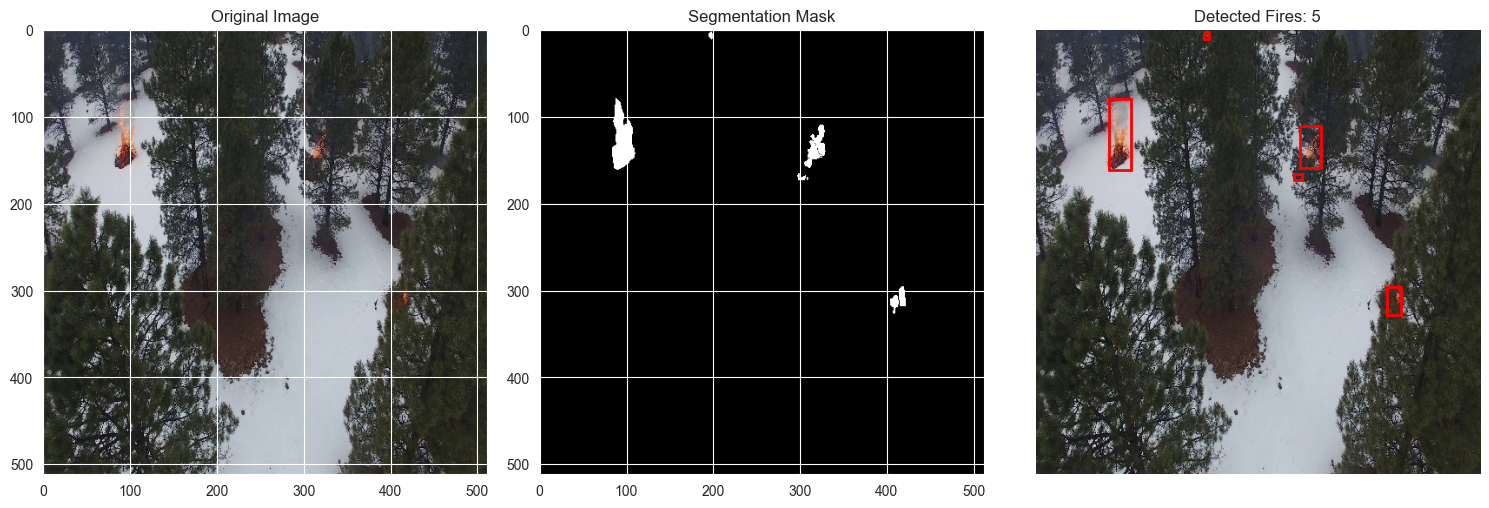

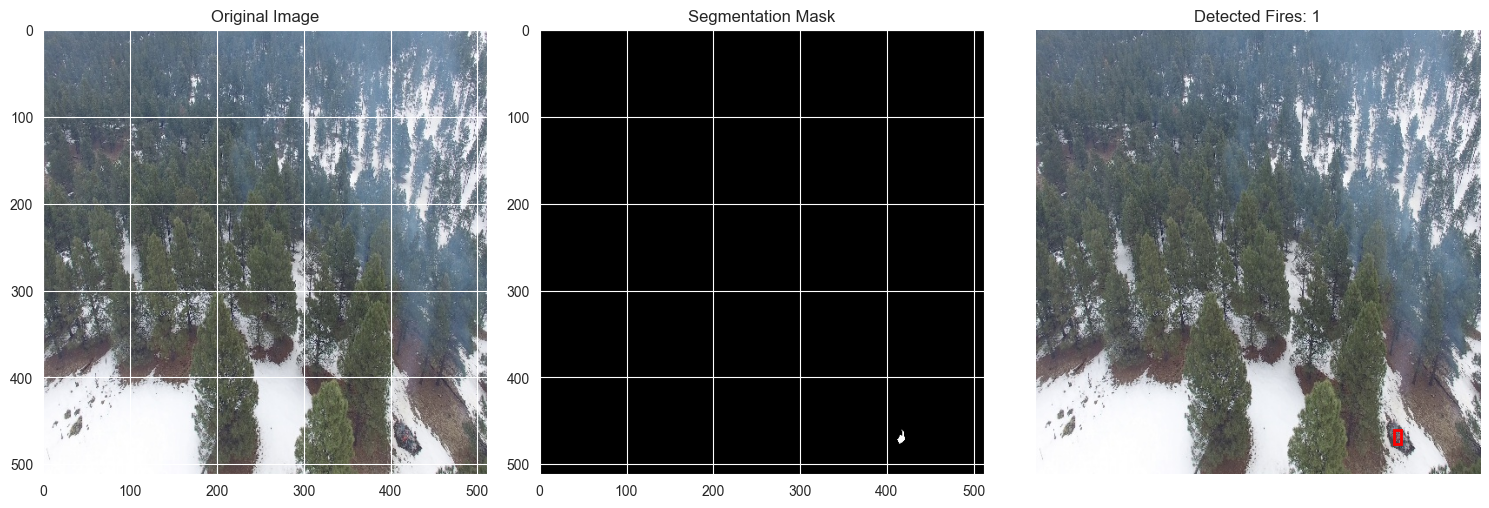

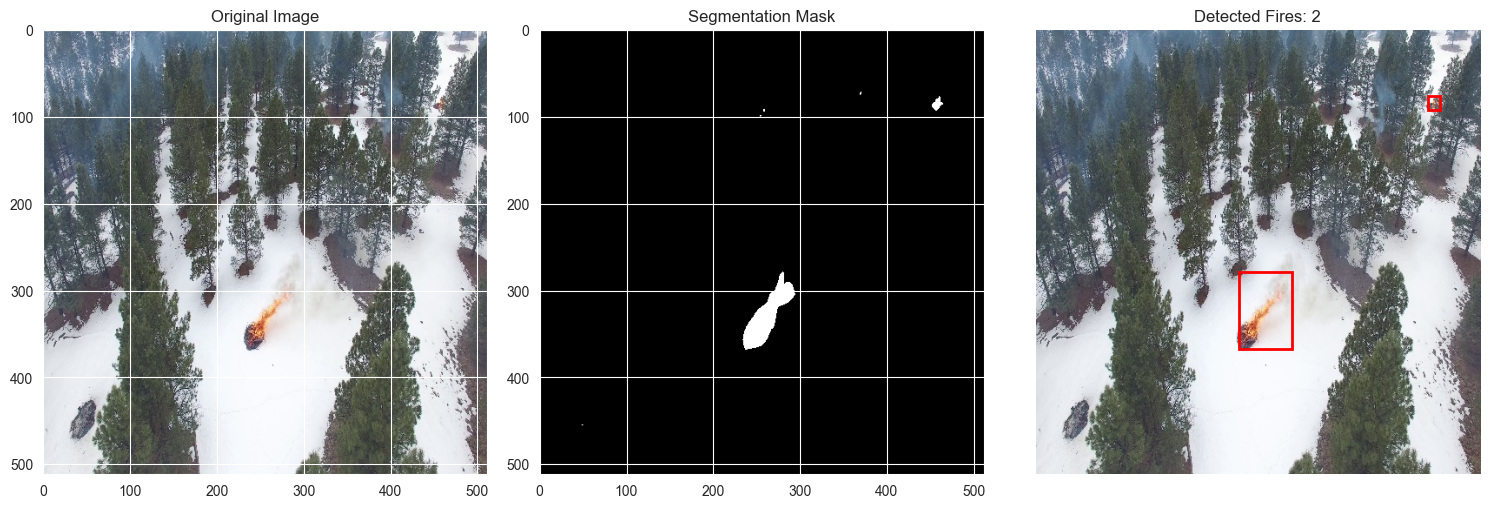


VAL split samples:


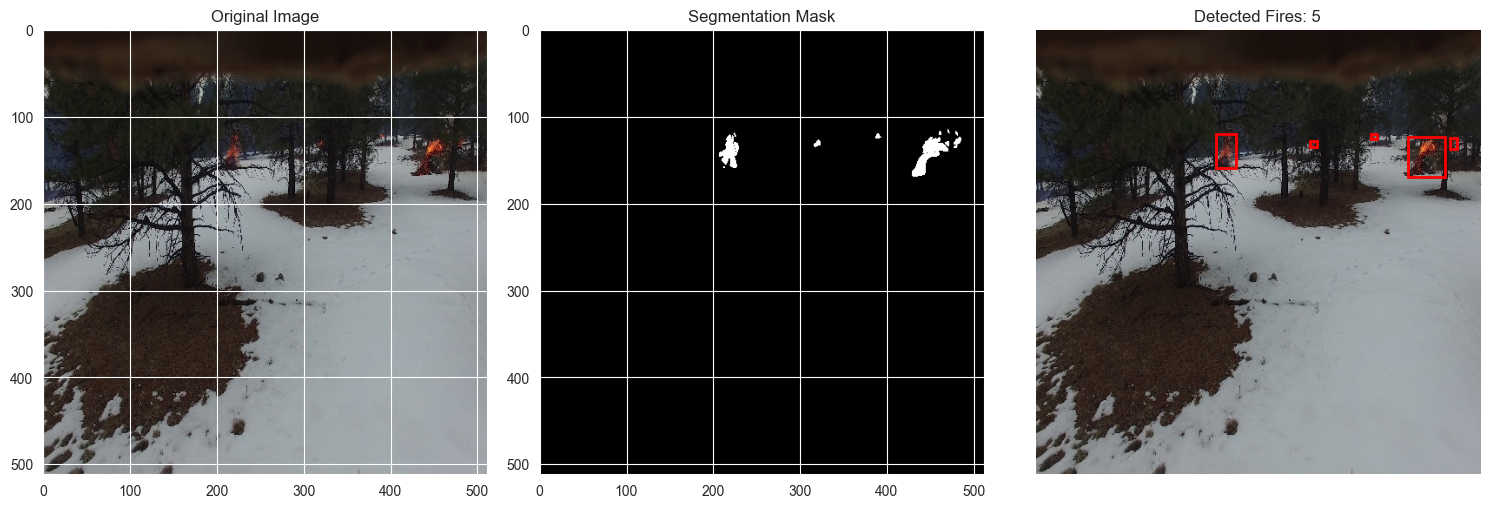

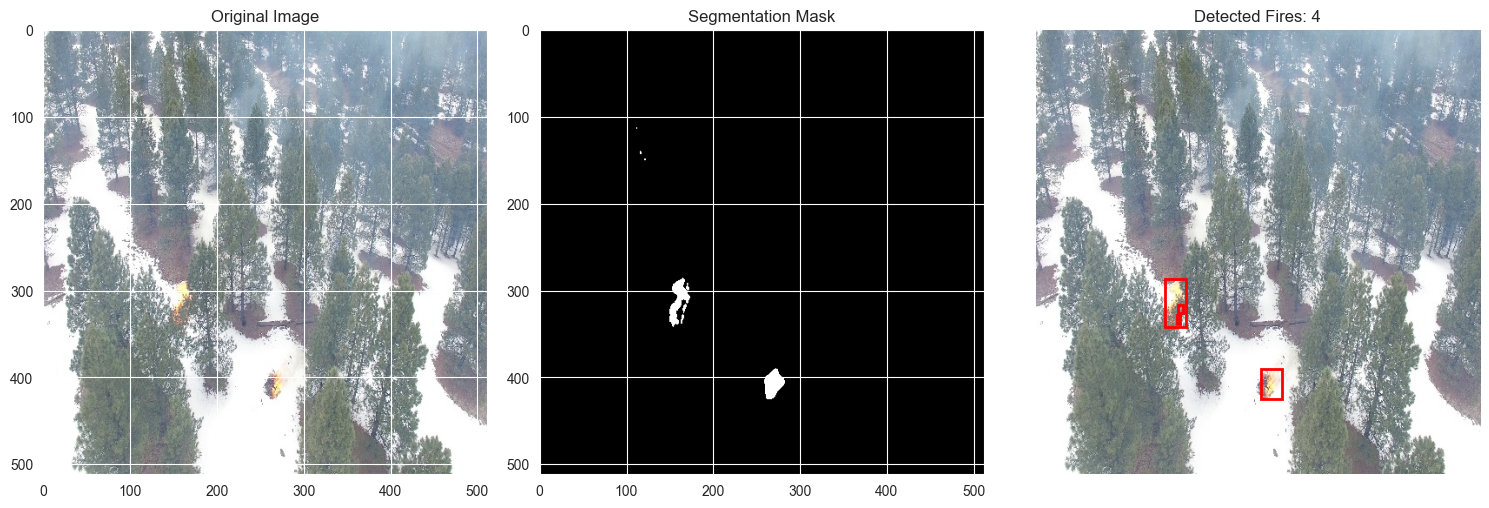

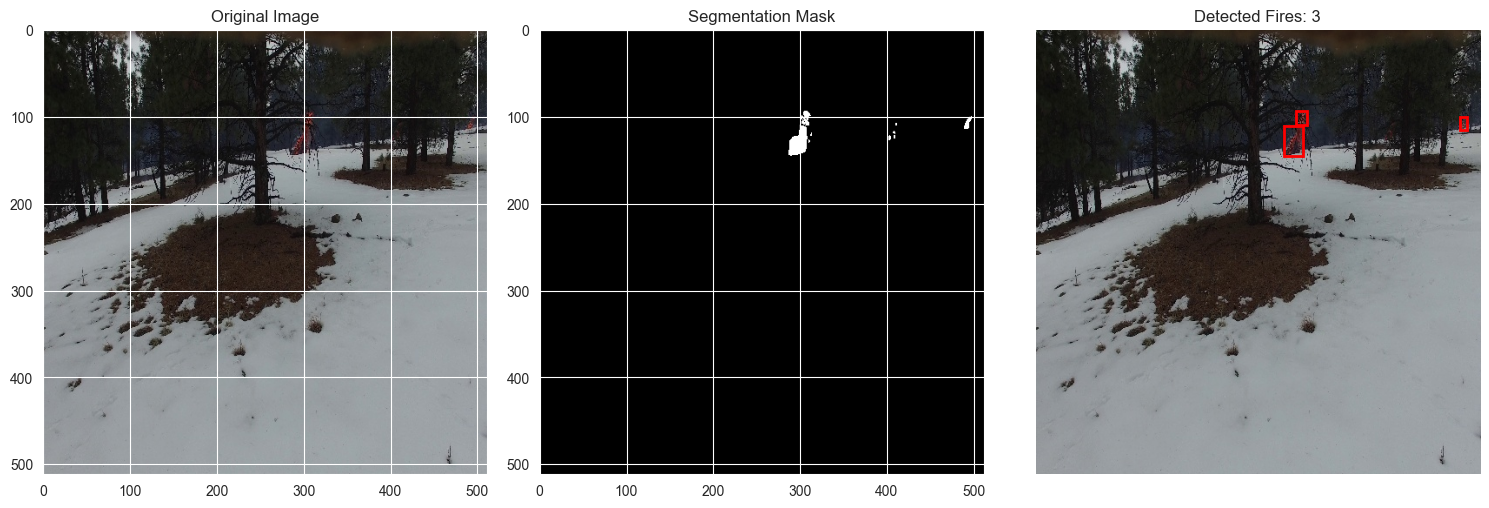


TEST split samples:


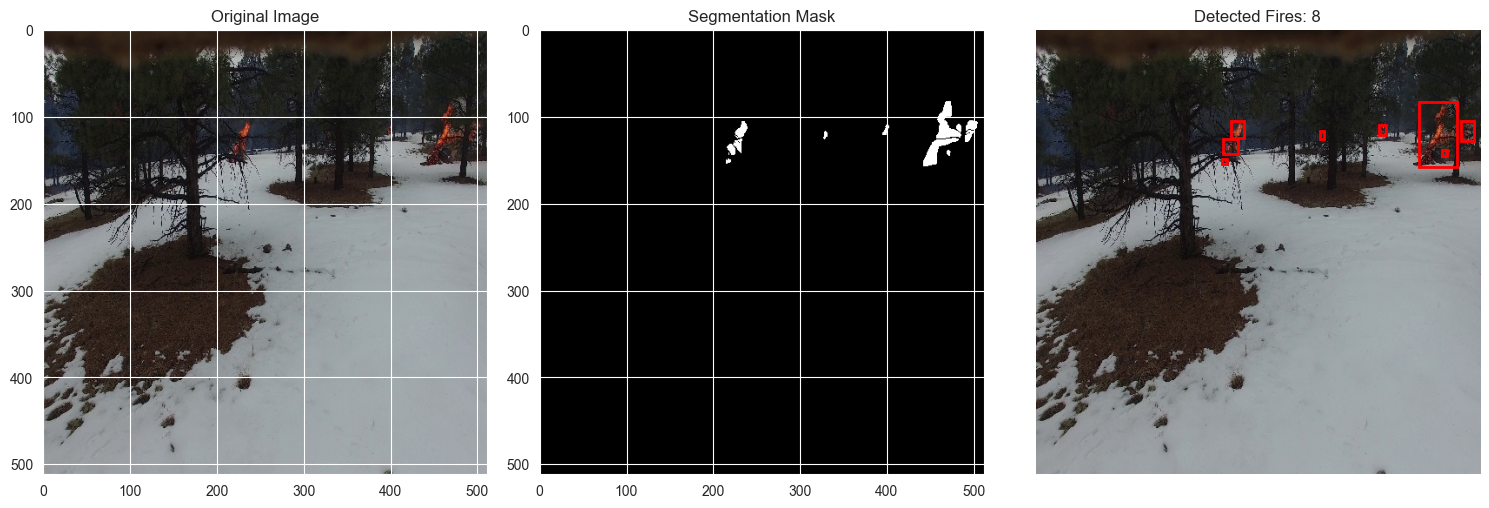

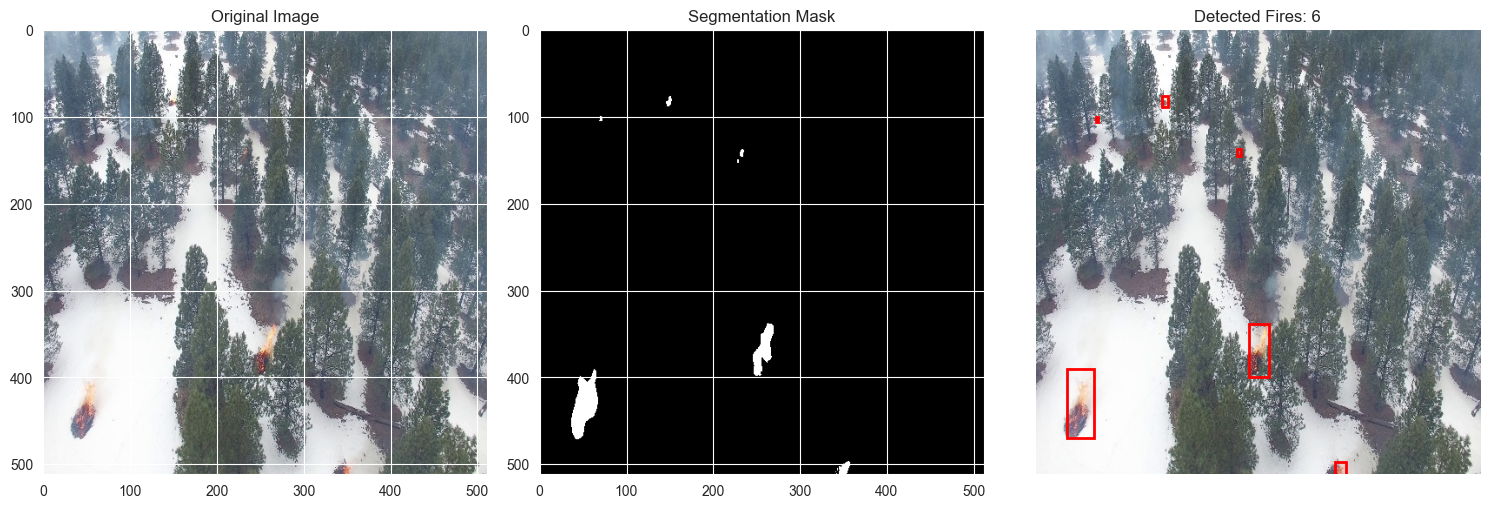

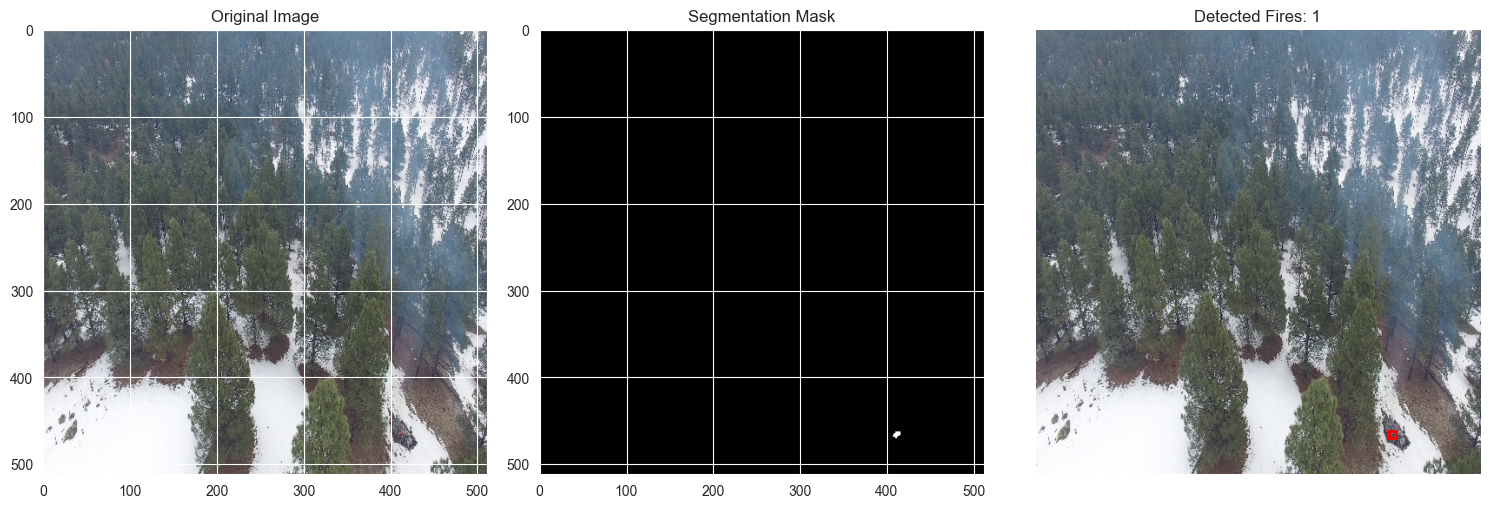

In [5]:
for split in ['train', 'val', 'test']:
        print(f"\n{split.upper()} split samples:")
        visualize_random_samples(split, num_samples=3)